In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw


In [114]:
entities = pd.read_csv('data_entities.csv', encoding = "ISO-8859-1",
                                sep=',')

In [115]:
entities =entities[entities.latitude>41]

In [116]:
entities.entity_type.unique()

array(['TrafficFlowObserved', 'NoiseLevelObserved', 'AirQualityObserved',
       'WeatherObserved'], dtype=object)

In [117]:
BBox = ((entities.longitude.min(),   entities.longitude.max(),      
         entities.latitude.min(), entities.latitude.max()))

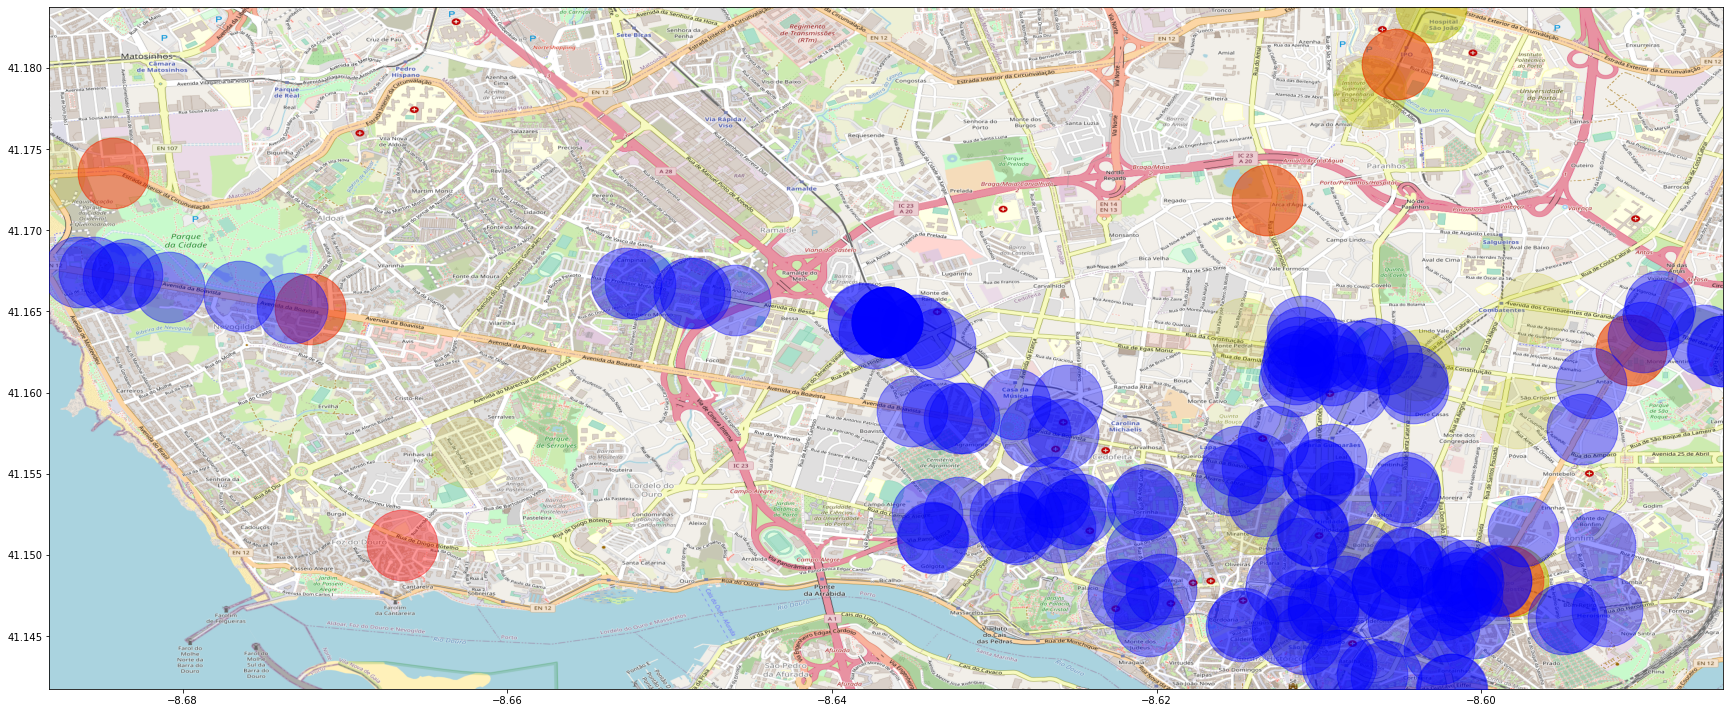

In [121]:
ruh_m = plt.imread('map.png')
fig, ax = plt.subplots(figsize = (30,30))


ax.scatter(entities[entities.entity_type=='TrafficFlowObserved'].longitude, entities[entities.entity_type=='TrafficFlowObserved'].latitude, zorder=3, alpha= 0.4, c='b', s=5000)
ax.scatter(entities[entities.entity_type=='AirQualityObserved'].longitude, entities[entities.entity_type=='AirQualityObserved'].latitude, zorder=2, alpha= 0.4, c='r', s=5000)
ax.scatter(entities[entities.entity_type=='WeatherObserved'].longitude, entities[entities.entity_type=='WeatherObserved'].latitude, zorder=1, alpha= 0.2, c='y', s=5000)

ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [90]:
a.min()

41.141756584

0.0


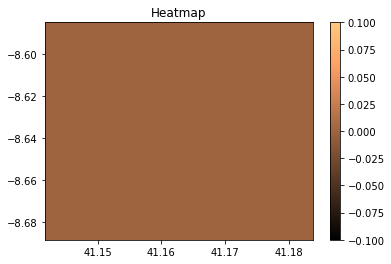

In [82]:
import numpy as np
import matplotlib.pyplot as plt

b, a = np.meshgrid(np.array(entities.longitude), np.array(entities.latitude))

c = ( a ** 2 + b ** 2) * np.exp(-a ** 2 - b ** 2)

c = c[:-1, :-1]
print(c[0, 0])
l_a=a.min()
r_a=a.max()
l_b=b.min()
r_b=b.max()
l_c,r_c  = -np.abs(c).max(), np.abs(c).max()

figure, axes = plt.subplots()

c = axes.pcolormesh(a, b, c, cmap='copper', vmin=l_c, vmax=r_c)
axes.set_title('Heatmap')
axes.axis([l_a, r_a, l_b, r_b])
figure.colorbar(c)

plt.show()
